In [43]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from pyproj import CRS
from numpy import datetime64
import geopandas as gpd
import pyproj

In [44]:
data_folder = Path("/home/schmidt/data/palm/")
data_file = Path("winter_iop_masked_M01.050.0003.trunc.all_new.nc")
ds = xr.open_dataset(data_folder / data_file, decode_cf=True, decode_times=True)
time = datetime64(ds.origin_time[:20]) + ds.time
ds

<ipython-input-44-c829b6c6da37>:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = datetime64(ds.origin_time[:20]) + ds.time


<xarray.Dataset>
Dimensions:        (ku_above_surf: 2, kw_above_surf: 2, time: 47, x: 3120, xu: 3120, y: 2560, yv: 2560, zs_3d: 2)
Coordinates:
  * ku_above_surf  (ku_above_surf) float64 1.0 2.0
  * kw_above_surf  (kw_above_surf) float64 1.0 2.0
  * time           (time) timedelta64[ns] 00:05:00.047400 ... 1 days 05:45:00...
  * x              (x) float64 7.5 22.5 37.5 ... 4.676e+04 4.678e+04 4.679e+04
  * xu             (xu) float64 0.0 15.0 30.0 ... 4.676e+04 4.677e+04 4.678e+04
  * y              (y) float64 7.5 22.5 37.5 ... 3.836e+04 3.838e+04 3.839e+04
  * yv             (yv) float64 0.0 15.0 30.0 ... 3.836e+04 3.837e+04 3.838e+04
  * zs_3d          (zs_3d) float64 9.969e+36 9.969e+36
Data variables:
    E_UTM          (x) float64 ...
    Eu_UTM         (xu) float64 ...
    Ev_UTM         (x) float64 ...
    N_UTM          (y) float64 ...
    Nu_UTM         (y) float64 ...
    Nv_UTM         (yv) float64 ...
    crs            int32 ...
    lat            (y, x) float64 ...
    latu           (y, xu) float64 ...
    latv           (yv, x) float64 ...
    lon            (y, x) float64 ...
    lonu           (y, xu) float64 ...
    lonv           (yv, x) float64 ...
    q              (time, ku_above_surf, y, x) float32 ...
    theta          (time, ku_above_surf, y, x) float32 ...
    ti             (time, ku_above_surf, y, x) float32 ...
    u              (time, ku_above_surf, y, xu) float32 ...
    v              (time, ku_above_surf, yv, x) float32 ...
    w              (time, kw_above_surf, y, x) float32 ...
Attributes:
    title:           PALM 6.0  Rev: 4464  run: winter_iop.00  nest-id: 01  ho...
    Conventions:     CF-1.7
    creation_time:   2020-03-20 13:03:37 +01
    data_content:    podsmasked
    version:         1
    origin_time:     2017-01-17 00:00:00 +00
    origin_lat:      52.325016021728516
    origin_lon:      13.082750797271729
    origin_x:        369341.5
    origin_y:        5798919.0
    origin_z:        10.23086929321289
    rotation_angle:  0.0
    dependencies:    
    history:         Tue Aug  4 15:03:38 2020: ncrcat -O winter_iop_masked_M0...
    author:          Suehring, Matthias, suehring@muk.uni-hannover.de
    contact_person:  
    institution:     Institute of Meteorology and Climatology, Leibniz Univer...
    acronym:         LUHimuk
    campaign:        winter iop 1
    location:        Berlin
    site:            Ernst Reuter Platz
    source:          PALM 6.0 Rev: 4464
    references:      text
    keywords:        text
    licence:         
    comment:         created with palm_csd
    VAR_LIST:        ;theta;q;u;v;w;ti;
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [45]:
plot_data = ds.theta.isel(ku_above_surf=1, time=range(20,25)).mean(axis=0)

In [46]:
# ds_crs = CRS.from_proj4("+proj=utm +zone=33 +ellps=GRS80 +units=m +no_defs +false_easting=50000 +central_meridian=9")
laender = gpd.read_file(data_folder / "Bundesländer_2016_ew.shp")
print(laender.crs)
#define projections
laender = laender.to_crs(crs=pyproj.CRS(25833), epsg="EPSG:25833")
print(laender.crs)

bezirke = gpd.read_file(data_folder / "Berlin_Bezirke.shp")
print(bezirke.crs)
#define projections
bezirke = bezirke.to_crs(crs=pyproj.CRS(25833), epsg="EPSG:25833")
print(bezirke.crs)

epsg:3857
epsg:25833
epsg:3857
epsg:25833


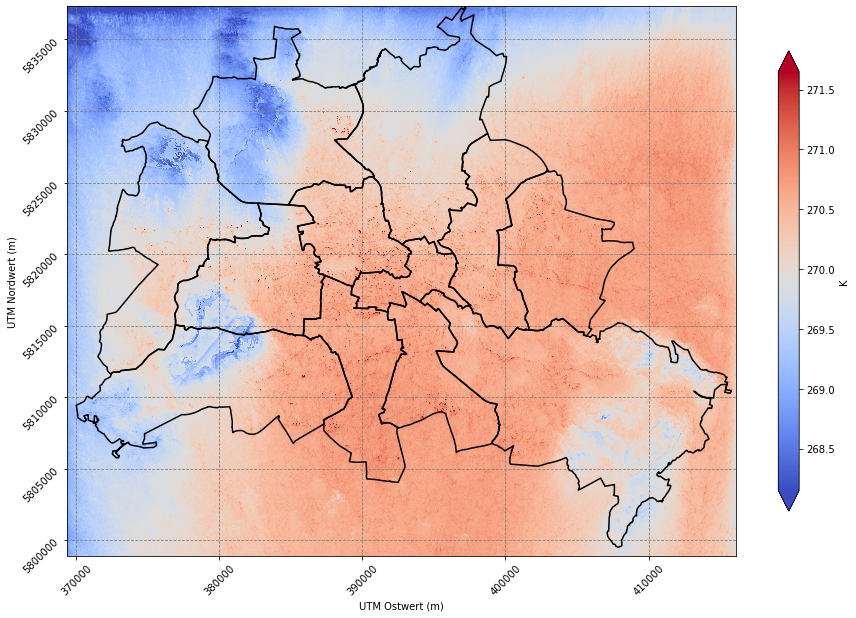

In [47]:
### Plot outer domain full
timesteps = range(20,25)
# xmin, xmax, ymin, ymax
selection=(0,1,0,1)
fig, ax = plt.subplots(figsize=(15, 15))
# ax = laender[laender['GEN'] == 'Berlin'].boundary.plot(ax=ax, color='k')
ax = bezirke.boundary.plot(ax=ax, color='k')
im = ax.pcolormesh(
    ds.E_UTM.data,
    ds.N_UTM.data, 
    plot_data, 
    cmap='coolwarm',
    shading='auto',
    vmax=271.65,
    vmin=268.15
)
cbar = plt.colorbar(im, extend='both', ax=ax, shrink=0.565)
cbar.ax.set_ylabel('K')
ax.ticklabel_format(style='plain')
ax.set_aspect('equal')
ax.set_xlabel('UTM Ostwert (m)')
ax.set_ylabel('UTM Nordwert (m)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(color='grey', linestyle='--', )
plt.show()

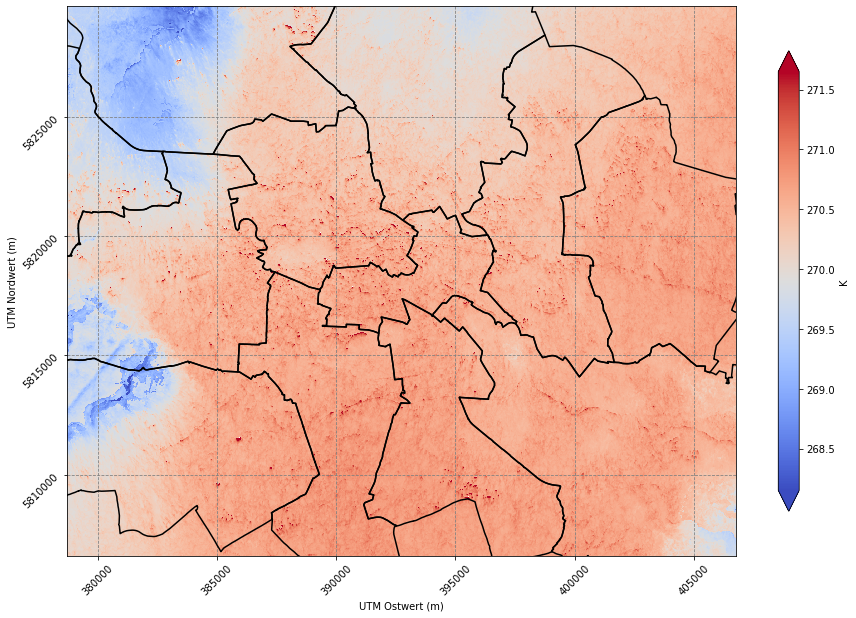

In [48]:
### Plot zoom level 1
timesteps = range(20,25)
# xmin, xmax, ymin, ymax
selection=(0,1,0,1)
fig, ax = plt.subplots(figsize=(15, 15))
# ax = laender[laender['GEN'] == 'Berlin'].boundary.plot(ax=ax, color='k')
ax = bezirke.boundary.plot(ax=ax, color='k')
im = ax.pcolormesh(
    ds.E_UTM.data,
    ds.N_UTM.data, 
    plot_data, 
    cmap='coolwarm',
    shading='auto',
    vmax=271.65,
    vmin=268.15
)
cbar = plt.colorbar(im, extend='both', ax=ax, shrink=0.565)
cbar.ax.set_ylabel('K')
ax.ticklabel_format(style='plain')
ax.set_aspect('equal')
ax.set_xlabel('UTM Ostwert (m)')
ax.set_ylabel('UTM Nordwert (m)')
ax.margins(-.2, -.2) 
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(color='grey', linestyle='--', )
plt.show()

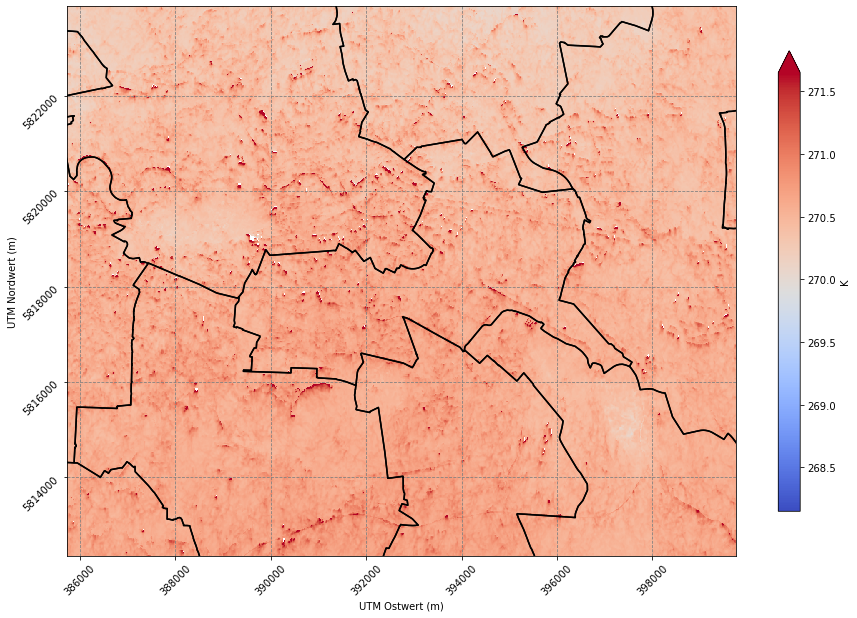

In [58]:
### Plot zoom level 2
timesteps = range(20,25)
# xmin, xmax, ymin, ymax
selection=(0,1,0,1)
fig, ax = plt.subplots(figsize=(15, 15))
# ax = laender[laender['GEN'] == 'Berlin'].boundary.plot(ax=ax, color='k')
ax = bezirke.boundary.plot(ax=ax, color='k')
im = ax.pcolormesh(
    ds.E_UTM.data,
    ds.N_UTM.data, 
    plot_data, 
    cmap='coolwarm',
    shading='auto',
    vmax=271.65,
    vmin=268.15
)
cbar = plt.colorbar(im, extend='max', ax=ax, shrink=0.565)
cbar.ax.set_ylabel('K')
ax.ticklabel_format(style='plain')
ax.set_aspect('equal')
ax.set_xlabel('UTM Ostwert (m)')
ax.set_ylabel('UTM Nordwert (m)')
ax.margins(-.35, -.35) 
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(color='grey', linestyle='--', )
plt.show()

In [50]:
data_file = Path("winter_iop_masked_N02_M01.050.0003.trunc.all_new.nc")
ds_id = xr.open_dataset(data_folder / data_file, decode_cf=True, decode_times=True)
time = datetime64(ds_id.origin_time[:20]) + ds_id.time
ds_id

<ipython-input-50-3f239497af24>:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = datetime64(ds_id.origin_time[:20]) + ds_id.time


<xarray.Dataset>
Dimensions:        (ku_above_surf: 4, kw_above_surf: 4, time: 47, x: 1920, xu: 1920, y: 1920, yv: 1920, zs_3d: 4)
Coordinates:
  * ku_above_surf  (ku_above_surf) float64 1.0 2.0 10.0 15.0
  * kw_above_surf  (kw_above_surf) float64 1.0 2.0 10.0 15.0
  * time           (time) timedelta64[ns] 00:05:00.047400 ... 1 days 05:45:00...
  * x              (x) float64 0.5 1.5 2.5 3.5 ... 1.918e+03 1.918e+03 1.92e+03
  * xu             (xu) float64 0.0 1.0 2.0 ... 1.917e+03 1.918e+03 1.919e+03
  * y              (y) float64 0.5 1.5 2.5 3.5 ... 1.918e+03 1.918e+03 1.92e+03
  * yv             (yv) float64 0.0 1.0 2.0 ... 1.917e+03 1.918e+03 1.919e+03
  * zs_3d          (zs_3d) float64 9.969e+36 9.969e+36 9.969e+36 9.969e+36
Data variables:
    E_UTM          (x) float64 ...
    Eu_UTM         (xu) float64 ...
    Ev_UTM         (x) float64 ...
    N_UTM          (y) float64 ...
    Nu_UTM         (y) float64 ...
    Nv_UTM         (yv) float64 ...
    crs            int32 ...
    lat            (y, x) float64 ...
    latu           (y, xu) float64 ...
    latv           (yv, x) float64 ...
    lon            (y, x) float64 ...
    lonu           (y, xu) float64 ...
    lonv           (yv, x) float64 ...
    q              (time, ku_above_surf, y, x) float32 ...
    theta          (time, ku_above_surf, y, x) float32 ...
    ti             (time, ku_above_surf, y, x) float32 ...
    u              (time, ku_above_surf, y, xu) float32 ...
    v              (time, ku_above_surf, yv, x) float32 ...
    w              (time, kw_above_surf, y, x) float32 ...
Attributes:
    title:           PALM 6.0  Rev: 4464  run: winter_iop.00  nest-id: 02  ho...
    Conventions:     CF-1.7
    creation_time:   2020-03-20 13:03:40 +01
    data_content:    podsmasked
    version:         1
    origin_time:     2017-01-17 00:00:00 +00
    origin_lat:      52.325016021728516
    origin_lon:      13.082750797271729
    origin_x:        385196.5
    origin_y:        5818435.0
    origin_z:        10.23086929321289
    rotation_angle:  0.0
    dependencies:    
    history:         Tue Aug  4 18:15:20 2020: ncrcat -O winter_iop_masked_N0...
    author:          Suehring, Matthias, suehring@muk.uni-hannover.de
    contact_person:  
    institution:     Institute of Meteorology and Climatology, Leibniz Univer...
    acronym:         LUHimuk
    campaign:        winter iop 1
    location:        Berlin
    site:            Ernst Reuter Platz
    source:          PALM 6.0 Rev: 4464
    references:      text
    keywords:        text
    licence:         
    comment:         created with palm_csd
    VAR_LIST:        ;theta;q;u;v;w;ti;
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

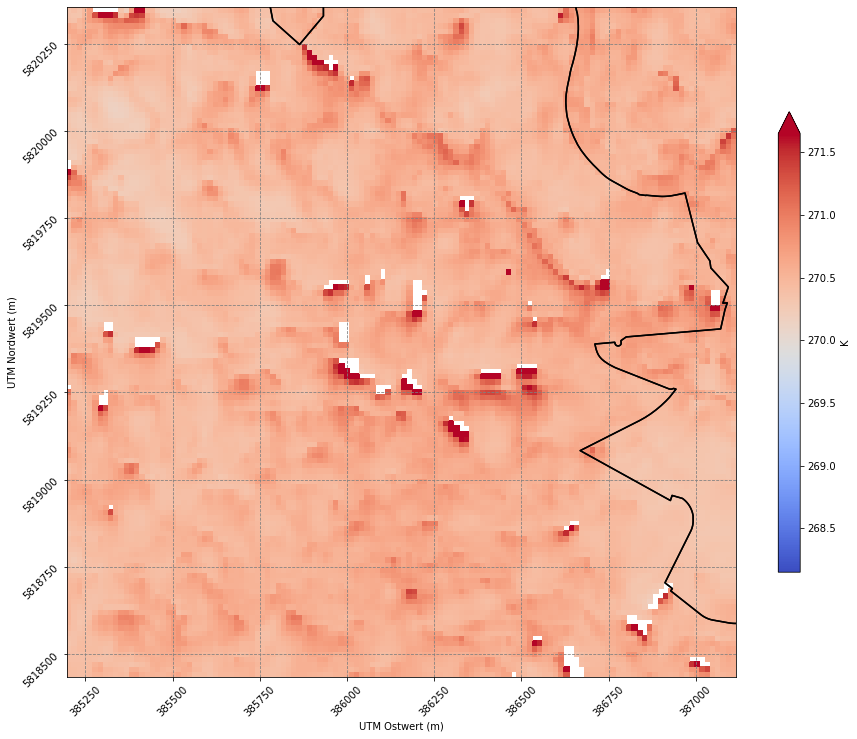

In [59]:
#### Plot outer domain with boundaries of inner domain (Zoom level 3)
timesteps = range(20,25)
# xmin, xmax, ymin, ymax
selection=(0,1,0,1)
fig, ax = plt.subplots(figsize=(15, 15))
# ax = laender[laender['GEN'] == 'Berlin'].boundary.plot(ax=ax, color='k')
ax = bezirke.boundary.plot(ax=ax, color='k')
im = ax.pcolormesh(
    ds.E_UTM.data,
    ds.N_UTM.data, 
    plot_data, 
    cmap='coolwarm',
    shading='auto',
    vmax=271.65,
    vmin=268.15
)
cbar = plt.colorbar(im, extend='max', ax=ax, shrink=0.565)
cbar.ax.set_ylabel('K')
ax.ticklabel_format(style='plain')
ax.set_aspect('equal')
ax.set_xlabel('UTM Ostwert (m)')
ax.set_ylabel('UTM Nordwert (m)')
plt.xlim((ds_id.E_UTM.data[0], ds_id.E_UTM.data[-1]))
plt.ylim((ds_id.N_UTM.data[0], ds_id.N_UTM.data[-1]))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(color='grey', linestyle='--', )
plt.show()

In [53]:
plot_data_id = ds_id.theta.isel(ku_above_surf=1, time=range(20,25)).mean(axis=0)

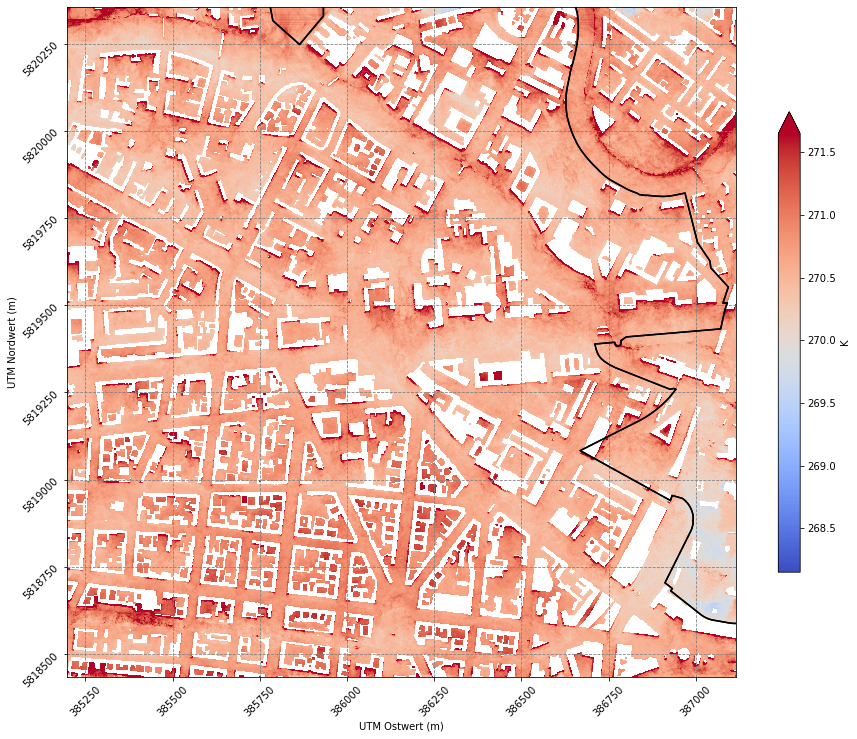

In [60]:
#### Plot inner domain full
timesteps = range(20,25)
# xmin, xmax, ymin, ymax
selection=(0,1,0,1)
fig, ax = plt.subplots(figsize=(15, 15))
# ax = laender[laender['GEN'] == 'Berlin'].boundary.plot(ax=ax, color='k')
im = ax.pcolormesh(
    ds_id.E_UTM.data,
    ds_id.N_UTM.data, 
    plot_data_id, 
    cmap='coolwarm',
    shading='auto',
    vmax=271.65,
    vmin=268.15
)
ax = bezirke.boundary.plot(ax=ax, color='k')
cbar = plt.colorbar(im, extend='max', ax=ax, shrink=0.565)
cbar.ax.set_ylabel('K')
ax.ticklabel_format(style='plain')
ax.set_aspect('equal')
ax.set_xlabel('UTM Ostwert (m)')
ax.set_ylabel('UTM Nordwert (m)')
plt.xlim((ds_id.E_UTM.data[0], ds_id.E_UTM.data[-1]))
plt.ylim((ds_id.N_UTM.data[0], ds_id.N_UTM.data[-1]))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(color='grey', linestyle='--', )
plt.show()

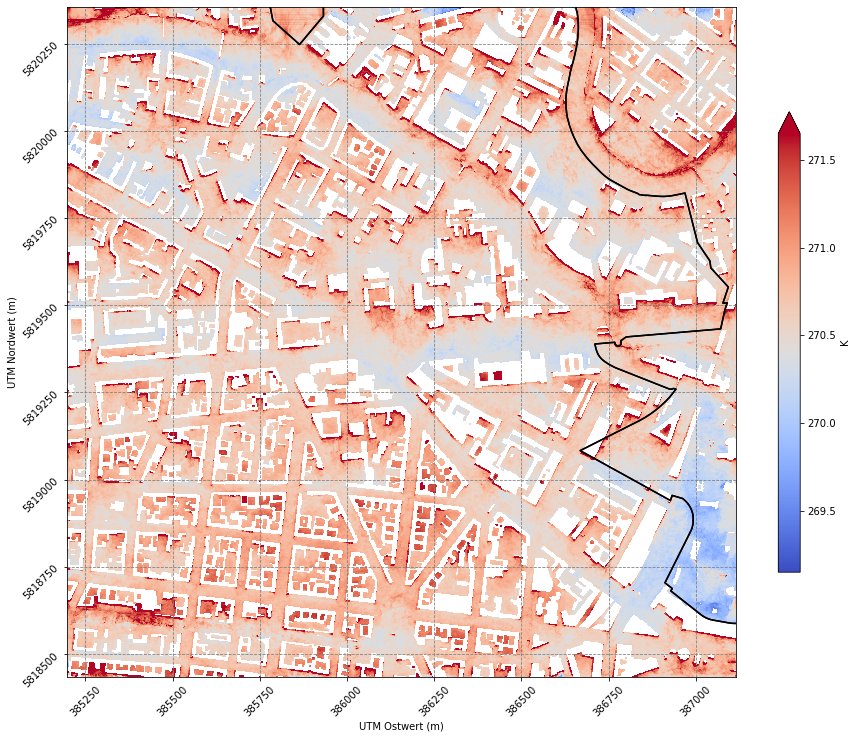

In [63]:
#### Plot inner domain (adjust colorbar)
timesteps = range(20,25)
# xmin, xmax, ymin, ymax
selection=(0,1,0,1)
fig, ax = plt.subplots(figsize=(15, 15))
# ax = laender[laender['GEN'] == 'Berlin'].boundary.plot(ax=ax, color='k')
im = ax.pcolormesh(
    ds_id.E_UTM.data,
    ds_id.N_UTM.data, 
    plot_data_id, 
    cmap='coolwarm',
    shading='auto',
    vmax=271.65,
    vmin=269.15
)
ax = bezirke.boundary.plot(ax=ax, color='k')
cbar = plt.colorbar(im, extend='max', ax=ax, shrink=0.565)
cbar.ax.set_ylabel('K')
ax.ticklabel_format(style='plain')
ax.set_aspect('equal')
ax.set_xlabel('UTM Ostwert (m)')
ax.set_ylabel('UTM Nordwert (m)')
plt.xlim((ds_id.E_UTM.data[0], ds_id.E_UTM.data[-1]))
plt.ylim((ds_id.N_UTM.data[0], ds_id.N_UTM.data[-1]))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(color='grey', linestyle='--', )
plt.show()